#  *EDA on Vehicle Insurance Customer Data*

## 1. Add the column names to both datasets:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as pyplot
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
table1 = pd.read_csv("customer_details.csv")

In [4]:
table2 = pd.read_csv("customer_policy_details.csv")

In [5]:
# i. Column Name for customer details table:
table1.columns = ["customer_id", "Gender", "age", "driving licence present",
                  "region code", "previously insured", "vehicle age", "vehicle damage"]

In [6]:
# ii. Column Name for customer_policy table:
table2.columns = ["customer_id", "annual premium (in Rs)", "sales channel code", "vintage", "response"]

## i. Null values

In [7]:

# Null values for customer_details
# Generate a summary of count of all the null values column wise
# Drop Null values for customer_id because central tendencies for id’s is not feasible.
# Replace all null values for numeric columns by mean.
# Replace all null values for Categorical value by mode.
print("Null value in 'customer_id' : ", table1["customer_id"].isnull().sum())
table1 = table1.dropna(subset=["customer_id"])
print("Null value in 'customer_id' after droping : ",
      table1["customer_id"].isnull().sum())

Null value in 'customer_id' :  386
Null value in 'customer_id' after droping :  0


In [8]:
print("Null value in 'Gender' : ", table1["Gender"].isnull().sum())
table1["Gender"] = table1["Gender"].fillna(table1["Gender"].mode()[0])
print("Null value in 'Gender' after replacing : ",
      table1["Gender"].isnull().sum())

Null value in 'Gender' :  368
Null value in 'Gender' after replacing :  0


In [9]:
print("Null value in 'age' : ", table1["age"].isnull().sum())
table1["age"] = table1["age"].fillna(table1["age"].mean())
print("Null value in 'age' after replacing : ", table1["age"].isnull().sum())

Null value in 'age' :  366
Null value in 'age' after replacing :  0


In [10]:
print("Null value in 'driving licence present' : ",
      table1["driving licence present"].isnull().sum())
table1["driving licence present"] = table1["driving licence present"].fillna(
    table1["driving licence present"].mode()[0])
print("Null value in 'driving licence present' after replacing : ",
      table1["driving licence present"].isnull().sum())

Null value in 'driving licence present' :  392
Null value in 'driving licence present' after replacing :  0


In [11]:
print("Null value in 'region code' : ", table1["region code"].isnull().sum())
table1["region code"] = table1["region code"].fillna(
    table1["region code"].mode()[0])
print("Null value in 'region code' after replacing : ",
      table1["region code"].isnull().sum())

Null value in 'region code' :  391
Null value in 'region code' after replacing :  0


In [12]:
print("Null value in 'previously insured' : ",
      table1["previously insured"].isnull().sum())
table1["previously insured"] = table1["previously insured"].fillna(
    table1["previously insured"].mode()[0])
print("Null value in 'previously insured' after replacing : ",
      table1["previously insured"].isnull().sum())

Null value in 'previously insured' :  381
Null value in 'previously insured' after replacing :  0


In [13]:
print("Null value in 'vehicle age' : ", table1["vehicle age"].isnull().sum())
table1["vehicle age"] = table1["vehicle age"].fillna(
    table1["vehicle age"].mode()[0])
print("Null value in 'vehicle age' after replacing : ",
      table1["vehicle age"].isnull().sum())

Null value in 'vehicle age' :  381
Null value in 'vehicle age' after replacing :  0


In [14]:
print("Null value in 'vehicle damage' : ",
      table1["vehicle damage"].isnull().sum())
table1["vehicle damage"] = table1["vehicle damage"].fillna(
    table1["vehicle damage"].mode()[0])
print("Null value in 'vehicle damage' after replacing : ",
      table1["vehicle damage"].isnull().sum())

Null value in 'vehicle damage' :  406
Null value in 'vehicle damage' after replacing :  0


In [15]:
# Null values for customer_policy_detail

In [16]:
print("Null value in 'customer_id' : ", table2["customer_id"].isnull().sum())
table2 = table2.dropna(subset=["customer_id"])
print("Null value in 'customer_id' after droping : ",
      table2["customer_id"].isnull().sum())

Null value in 'customer_id' :  387
Null value in 'customer_id' after droping :  0


In [17]:
print("Null value in 'annual premium (in Rs)' : ",
      table2["annual premium (in Rs)"].isnull().sum())
table2["annual premium (in Rs)"] = table2["annual premium (in Rs)"].fillna(
    table2["annual premium (in Rs)"].mean())
print("Null value in 'annual premium (in Rs)' after replacing : ",
      table2["annual premium (in Rs)"].isnull().sum())

Null value in 'annual premium (in Rs)' :  344
Null value in 'annual premium (in Rs)' after replacing :  0


In [18]:
print("Null value in 'sales channel code' : ",
      table2["sales channel code"].isnull().sum())
table2["sales channel code"] = table2["sales channel code"].fillna(
    table2["sales channel code"].mode()[0])
print("Null value in 'sales channel code' after replacing : ",
      table2["sales channel code"].isnull().sum())

Null value in 'sales channel code' :  400
Null value in 'sales channel code' after replacing :  0


In [19]:
print("Null value in 'vintage' : ", table2["vintage"].isnull().sum())
table2["vintage"] = table2["vintage"].fillna(table2["vintage"].mean())
print("Null value in 'vintage' after replacing : ",
      table2["vintage"].isnull().sum())

Null value in 'vintage' :  388
Null value in 'vintage' after replacing :  0


In [20]:
print("Null value in 'response' : ", table2["response"].isnull().sum())
table2["response"] = table2["response"].fillna(table2["response"].mode()[0])
print("Null value in 'response' after replacing : ",
      table2["response"].isnull().sum())

Null value in 'response' :  361
Null value in 'response' after replacing :  0


# Outliers

## ii. Outliers

In [21]:
# Generate a summary of count of all the outliers column wise
# Replace all outlier values for numeric columns by mean.
# table1
table1.describe()
table2.describe()
Q1 = table1.describe().loc["25%", "age"]
Q3 = table1.describe().loc["75%", "age"]
IQR = Q3-Q1
print(table1.loc[table1["age"] < (Q1-IQR*1.5), "age"].count())
print(table1.loc[table1["age"] > (Q3+IQR*1.5), "age"].count())
# there are no outliers in 'age' column

0
0


In [22]:
# table2
Q1 = table2.describe().loc["25%", "annual premium (in Rs)"]
Q3 = table2.describe().loc["75%", "annual premium (in Rs)"]
IQR = Q3-Q1
print(table2.loc[table2["annual premium (in Rs)"] < (
    Q1-IQR*1.5), "annual premium (in Rs)"].count())
print(table2.loc[table2["annual premium (in Rs)"] > (
    Q3+IQR*1.5), "annual premium (in Rs)"].count())
table2.loc[table2["annual premium (in Rs)"] > (
    Q3+IQR*1.5), "annual premium (in Rs)"] = table2["annual premium (in Rs)"].mean()
print(table2.loc[table2["annual premium (in Rs)"] > (
    Q3+IQR*1.5), "annual premium (in Rs)"].count())
Q1 = table2.describe().loc["25%", "vintage"]
Q3 = table2.describe().loc["75%", "vintage"]
IQR = Q3-Q1
print(table2.loc[table2["vintage"] < (Q1-IQR*1.5), "vintage"].count())
print(table2.loc[table2["vintage"] > (Q3+IQR*1.5), "vintage"].count())
# there are no outliers in 'vintage' column

0
10332
0
0
0


In [23]:
table1.describe()
table2.describe()
Q1 = table1.describe().loc["25%", "age"]
Q3 = table1.describe().loc["75%", "age"]
IQR = Q3-Q1
print("The Outliers replace is : ")
print(table1.loc[table1["age"] < (Q1-IQR*1.5), "age"].count())
print(table1.loc[table1["age"] > (Q3+IQR*1.5), "age"].count())

Q1 = table2.describe().loc["25%", "annual premium (in Rs)"]
Q3 = table2.describe().loc["75%", "annual premium (in Rs)"]
IQR = Q3-Q1
print(table2.loc[table2["annual premium (in Rs)"] < (
    Q1-IQR*1.5), "annual premium (in Rs)"].count())
print(table2.loc[table2["annual premium (in Rs)"] > (
    Q3+IQR*1.5), "annual premium (in Rs)"].count())
table2.loc[table2["annual premium (in Rs)"] > (
    Q3+IQR*1.5), "annual premium (in Rs)"] = table2["annual premium (in Rs)"].mean()
print(table2.loc[table2["annual premium (in Rs)"] > (
    Q3+IQR*1.5), "annual premium (in Rs)"].count())
Q1 = table2.describe().loc["25%", "vintage"]
Q3 = table2.describe().loc["75%", "vintage"]
IQR = Q3-Q1

print(table2.loc[table2["vintage"] < (Q1-IQR*1.5), "vintage"].count())
print(table2.loc[table2["vintage"] > (Q3+IQR*1.5), "vintage"].count())

The Outliers replace is : 
0
0
64735
2708
0
0
0


# White spaces
## iii. White spaces

In [24]:
# Remove white spaces

# 2.3.1 Remove Whitespaces for table1
table1.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# 2.3.2 Remove Whitespaces for table2
table2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# case correction

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


## iv. case correction(lower or upper, any one)

In [25]:
# 2.4.1 case correction for table1
table1.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

# 2.4.2 case correction for table2
table2.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


# creating dummies
## v. Convert nominal data (categorical) into dummies

In [26]:
# for future modeling use if required
# 2.5.1 converting categorical data into dummy variables for table1

dummies_gender = pd.get_dummies(table1["Gender"])
dummies_d_l_p = pd.get_dummies(table1["driving licence present"])
dummies_rc = pd.get_dummies(table1["region code"])
dummies_p_i = pd.get_dummies(table1["previously insured"])
dummies_vehicle_age = pd.get_dummies(table1["vehicle age"])
dummies_vehicle_damage = pd.get_dummies(table1["vehicle damage"])

In [27]:
# 2.5.2 converting categorical data into dummy variables for table2
dummies_scc = pd.get_dummies(table2["sales channel code"])
dummies_vi = pd.get_dummies(table2["vintage"])
dummies_res = pd.get_dummies(table2["response"])

## vi. Drop Duplicates (duplicated rows)

In [28]:
# checking for any duplicates
# 2.6.1 dropping duplicate rows for table1
table1.drop_duplicates(inplace=True)
table1



,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [29]:
# 2.6.2 dropping duplicate rows for table2
table2.drop_duplicates(inplace=True)
table2

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [30]:
print(table1.duplicated().sum())
print(table2.duplicated().sum())

0
0


### step 3 ( Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables.)

In [31]:

master_df = pd.merge(table1, table2, on='customer_id')
master_df

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage,annual premium (in Rs),sales channel code,vintage,response
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No,30170.0,26.0,88.0,0.0
380332,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No,40016.0,152.0,131.0,0.0
380333,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No,35118.0,160.0,161.0,0.0
380334,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,74.0,0.0


# STEP4: getting information

Gender
Female    29055.342565
Male      29098.196495
Name: annual premium (in Rs), dtype: float64


Data is balanced between the two genders because the averages are approximately equal



Gender wise average annual premium:


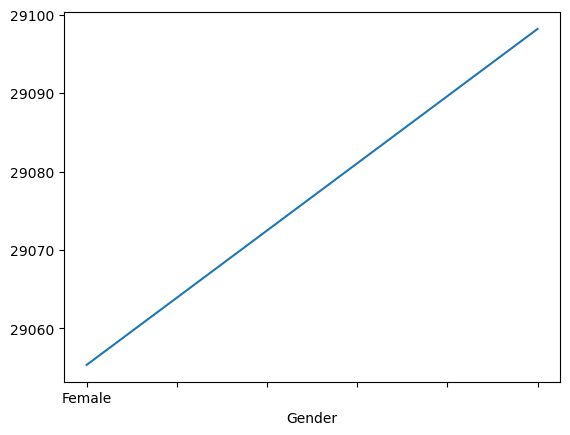

In [32]:
# Gender wise average annual premium
aap_gender_df = master_df.groupby(["Gender"])["annual premium (in Rs)"].mean()
print(aap_gender_df)
print("\n")
print("Data is balanced between the two genders because the averages are approximately equal")
print("\n\n")
print("Gender wise average annual premium:")
aap_gender_df.plot()
pyplot.show()

Age wise average annual premium:


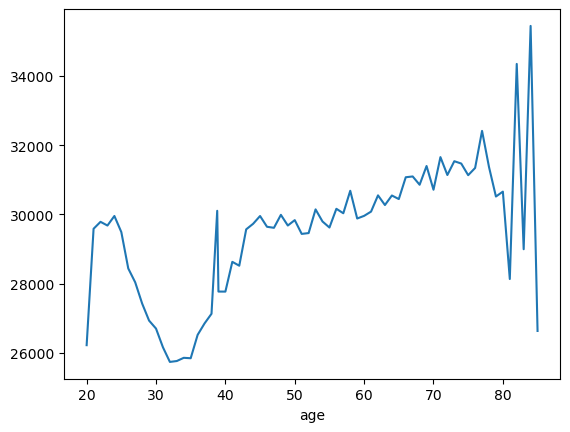

In [33]:
# age wise average annual premium
aap_age_df = master_df.groupby(["age"])["annual premium (in Rs)"].mean()
print("Age wise average annual premium:")
# print(aap_age_df)
aap_age_df.plot()
pyplot.show()

In [34]:
# Is your data balanced between the genders?
print(
    f"Male to Female ratio is {round(master_df['Gender'].value_counts()[0]/master_df['Gender'].value_counts()[1],2)}")
print(
    f"Generally, the standard is: \nBalanced data ratio: {50/50}\nSlightly balanced data ratio: {round(55/45,2)}-{60/40} \nImbalanced data ratio: {80/20}-{90/10}")
print("\n")
# data is balanced between the two genders because the averages are approximately equal

Male to Female ratio is 1.18
Generally, the standard is: 
Balanced data ratio: 1.0
Slightly balanced data ratio: 1.22-1.5 
Imbalanced data ratio: 4.0-9.0




Vehicle_age wise average annual premium:


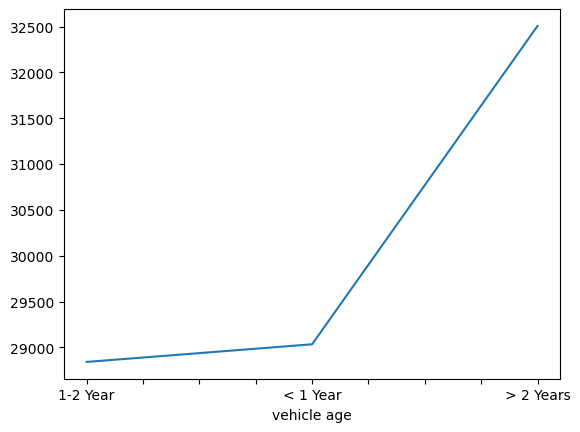

In [35]:
# vehicle_age wise average annual premium
aap_v_age_df = master_df.groupby(["vehicle age"])[
    "annual premium (in Rs)"].mean()
print("Vehicle_age wise average annual premium:")
# print(aap_v_age_df)
aap_v_age_df.plot()
pyplot.show()

<AxesSubplot:title={'center':'Number of Gender'}, xlabel='annual premium (in Rs)', ylabel='count'>

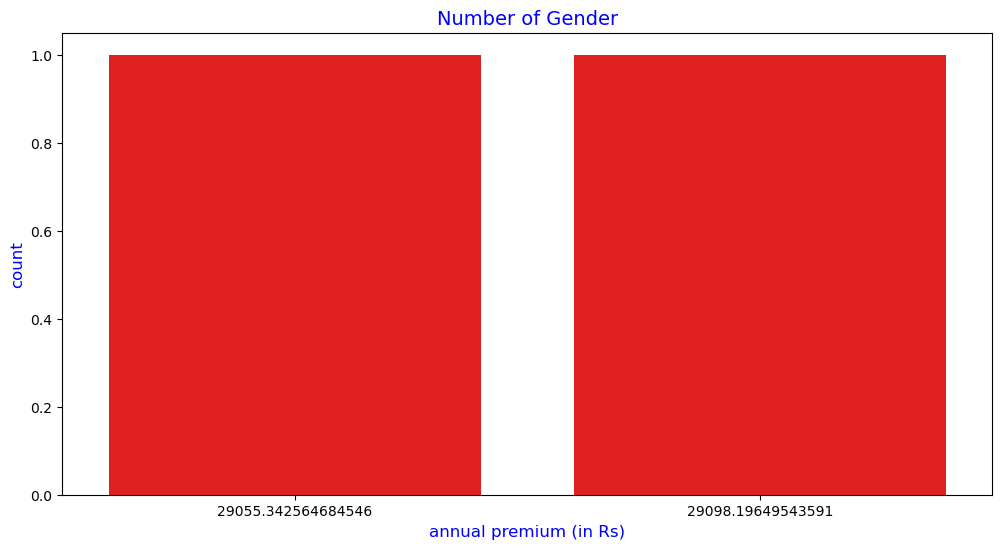

In [36]:
pyplot.figure(figsize=(12, 6))
pyplot.grid(False)
pyplot.title('Number of Gender', color='blue', fontsize=14)
pyplot.xlabel('Gender', fontsize=12, color='blue')
pyplot.ylabel(None, color='blue', fontsize=12)
sns.countplot(x=aap_gender_df, color='red')

In [37]:
insurance_premium = master_df.groupby(
    'vehicle age')['annual premium (in Rs)'].mean()
insurance_state = master_df.groupby('age')['annual premium (in Rs)'].mean()
insurance_claim = master_df.groupby('previously insured')['age'].mean()

fig, axes = pyplot.subplots(1, 3, figsize=(15, 5))
pyplot.tight_layout(pad=4)
sns.set_style('whitegrid')

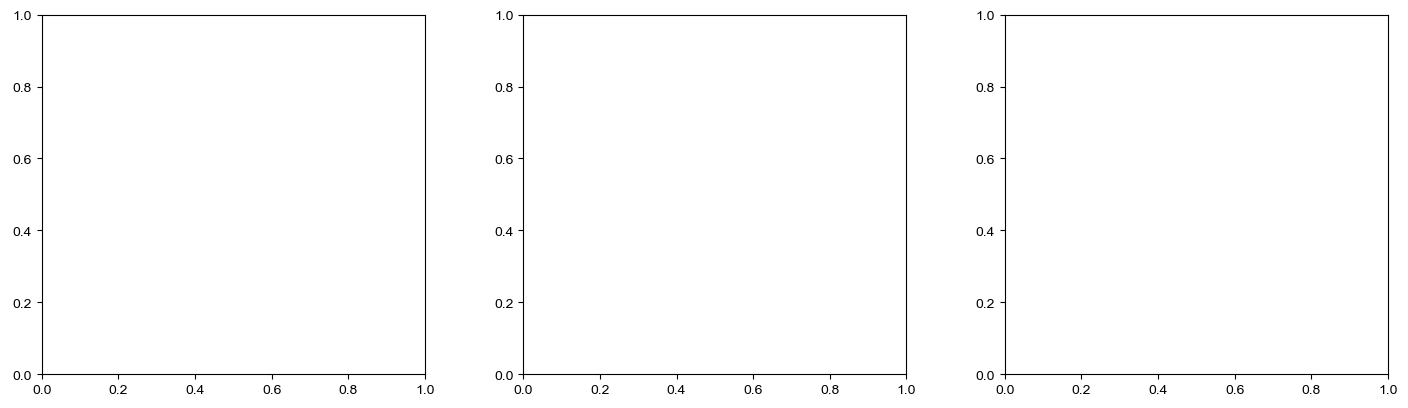

In [38]:
fig, axes = pyplot.subplots(1, 3, figsize=(15, 5))
pyplot.tight_layout(pad=4)
sns.set_style('whitegrid')

In [39]:
axes[1].set_xlabel('annual premium (in Rs)', fontsize=12)
axes[0].set_ylabel('Vehicle Age', fontsize=12, color='blue')
axes[0].set_ylim([1200, 1270])
axes[0].grid(False)
axes[0].set_title('Average Yearly Policy Premium in Vehicle age',
                  fontsize=15, color='blue')
insurance_premium.plot(kind='bar', ax=axes[0], grid=False)

<AxesSubplot:title={'center':'Average Yearly Policy Premium in Vehicle age'}, xlabel='vehicle age', ylabel='Vehicle Age'>

In [40]:
axes[1].set_xlabel('annual premium (in Rs)', fontsize=12)
axes[1].set_ylabel('Age', fontsize=12, color='blue')
axes[1].set_title('Average Annual Policy in age', fontsize=15, color='blue')
insurance_state.plot(
    kind='line', ax=axes[1], marker='.', c='y', ls='-', lw=3, ms=10, mec='red', grid=False)

<AxesSubplot:title={'center':'Average Annual Policy in age'}, xlabel='age', ylabel='Age'>

In [41]:
axes[2].set_xlabel('previously insured', fontsize=12, color='blue')
axes[2].set_ylabel('age', fontsize=12, color='blue')
axes[2].set_title('Average age in previously insured',
                  fontsize=15, color='blue')
insurance_state.plot(kind='line', ax=axes[2], marker='.',
                     c='g', ls='-', lw=2, ms=8, mew=2, mec='navy', grid=False)

<AxesSubplot:title={'center':'Average age in previously insured'}, xlabel='age', ylabel='age'>

In [42]:
drive = master_df['Gender']

In [43]:
Vehicles_involved = drive.value_counts()
damage = master_df['vehicle damage']
Type_of_collision = damage.value_counts()

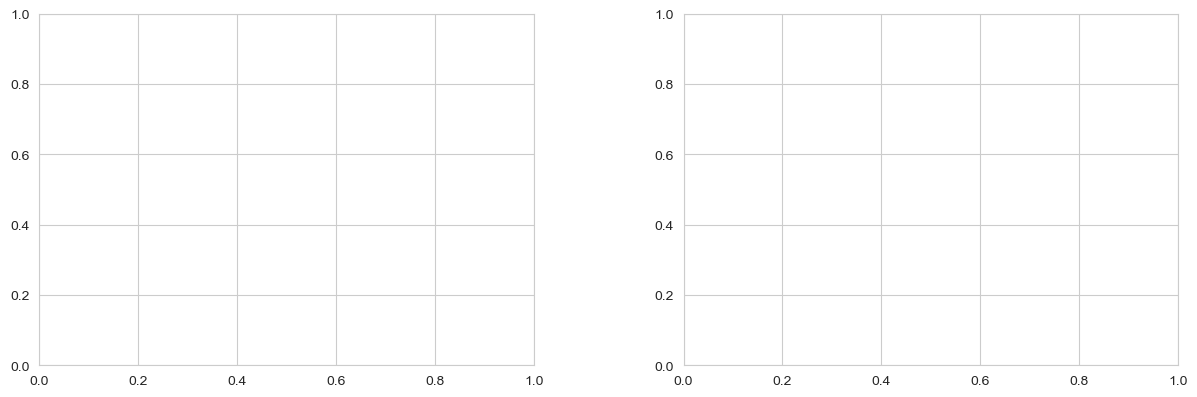

In [44]:
fig, axes = pyplot.subplots(1, 2, figsize=(14, 6))
pyplot.tight_layout(pad=8)

In [45]:
axes[0].set_title('Number of Gender', fontsize=15, color='blue')
axes[0].pie(Vehicles_involved, labels=Vehicles_involved.index,
            autopct='%1.1f%%', startangle=180)

([<matplotlib.patches.Wedge at 0x1acce654ca0>,
 [Text(0.14209838093644817, -1.0907832278391707, 'Male'),
  Text(-0.14209848306294365, 1.0907832145349554, 'Female')],
 [Text(0.07750820778351716, -0.5949726697304567, '54.1%'),
  Text(-0.07750826348887833, 0.594972662473612, '45.9%')])

In [46]:
axes[1].set_title('Type of damage', fontsize=15, color='blue')
axes[1].pie(Type_of_collision, labels=Type_of_collision.index,
            autopct='%1.1f%%', startangle=180)

([<matplotlib.patches.Wedge at 0x1acce6afd00>,
 [Text(0.01873451982144257, -1.0998404510505422, 'Yes'),
  Text(-0.018734519821442433, 1.0998404510505422, 'No')],
 [Text(0.010218828993514126, -0.5999129733002957, '50.5%'),
  Text(-0.010218828993514053, 0.5999129733002957, '49.5%')])

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

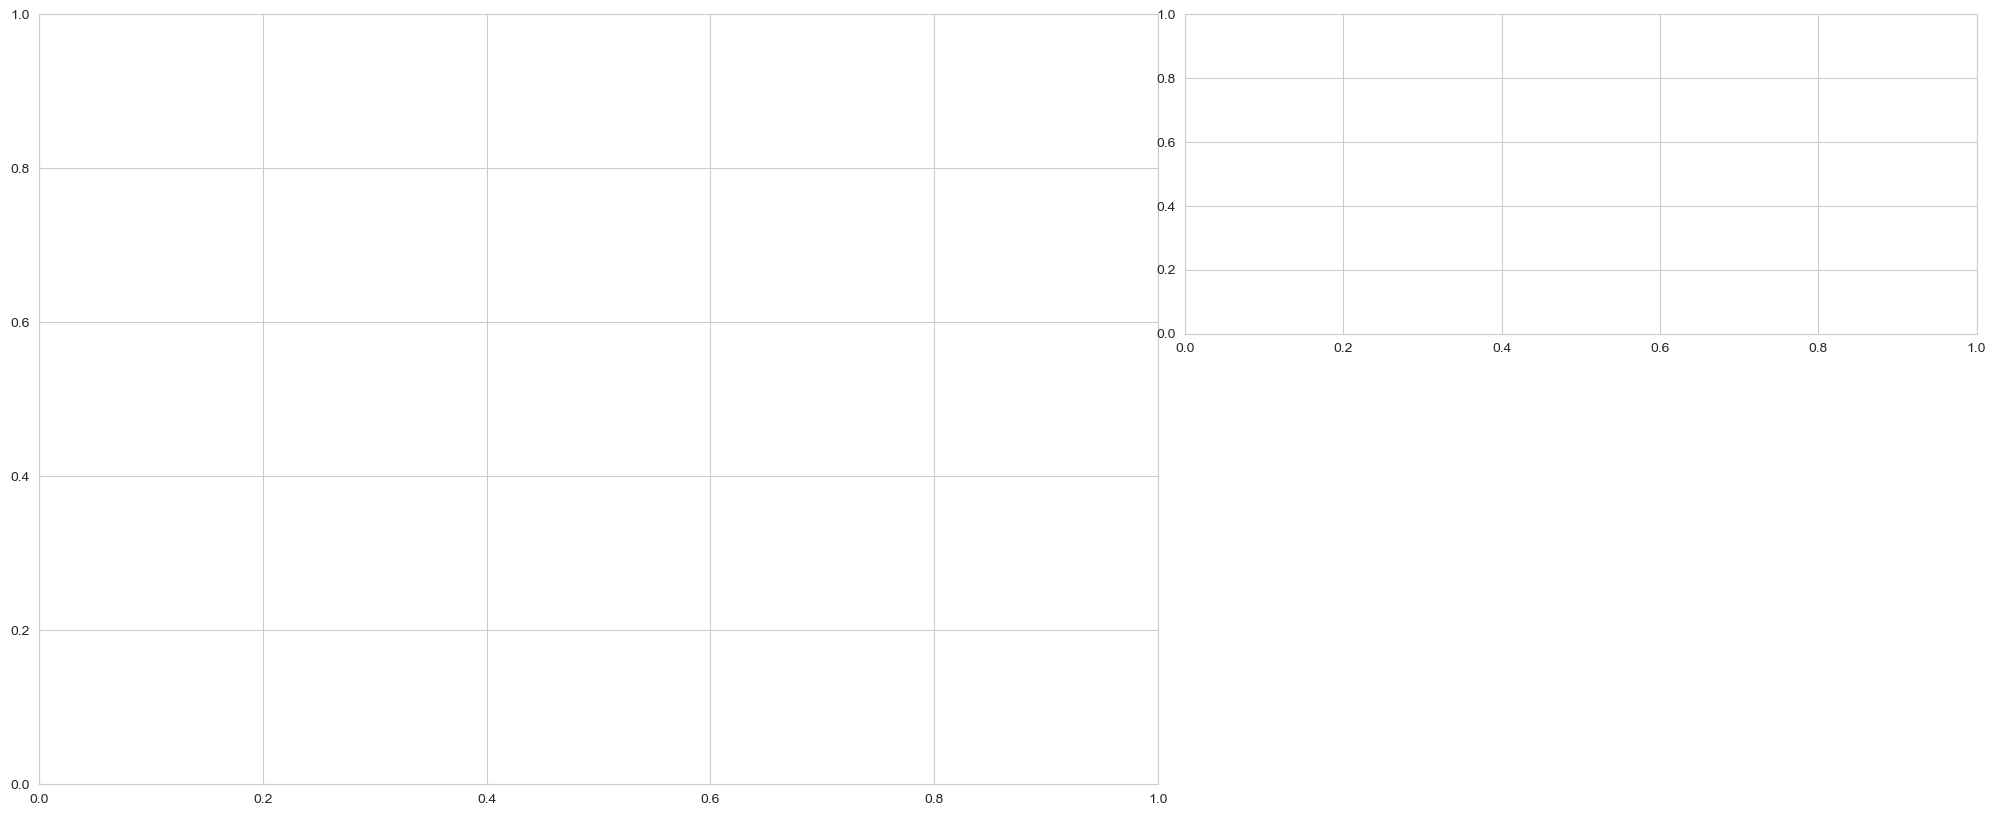

In [48]:
fig = plt.figure(figsize=(25, 10))
ax1 = plt.subplot2grid((7, 12), (0, 0), rowspan=7, colspan=7)
ax2 = plt.subplot2grid((7, 12), (0, 7), rowspan=3, colspan=5)

In [49]:
regionCode = master_df['previously insured']
Accident_witnesses = pd.crosstab(master_df.age, regionCode)
sns.heatmap(Accident_witnesses, fmt="d", annot=True,
            linecolor='black', linewidths=.5, ax=ax1)
ax1.set_title('age by previously insured', fontsize=15, color='blue')
ax1.set_xlabel('previously insured', fontsize=15, color='blue')
ax1.set_ylabel('age', fontsize=15, color='blue')


Text(285.22222222222223, 0.5, 'age')

In [50]:
damage = ['vehicle damage']
Authorities_contacted = master_df.Gender.value_counts()
Authorities_contacted.plot(kind='bar', grid=False, ax=ax2)
xlabels = Authorities_contacted .index
ax2.set_xticklabels(xlabels, rotation=0)
ax2.set_title('By Gender', fontsize=14, color='blue')
ax2.set_xlabel("Gender", fontsize=12, color='blue')
ax2.set_ylabel("% of Total Gender", fontsize=12, color='blue')

Text(1423.9739827856024, 0.5, '% of Total Gender')

## STEP5: Is there any relation between Person Age and annual premium?

In [51]:
print("Is there any relation between Person Age and annual premium?")
n = master_df['age'].corr(master_df['annual premium (in Rs)'])
if n < -0.5:
    print("Strong negative relationship")
if n > 0.5:
    print("Strong positive relationship")
if n > -0.5 and n < 0.5:
    print("There is no relationship!")


Is there any relation between Person Age and annual premium?
There is no relationship!
